In [13]:
import pandas as pd 

df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

Question 1: What is the distribution of the electrical range across different makes and models? Which counties in Washington have the highest number of electric vehicles, and what's the breakdown by type (BEV VS PHEV)

https://medium.com/%40pingsubhak/handling-missing-values-in-dataset-7-methods-that-you-need-to-know-5067d4e32b62

https://medium.com/%40pingsubhak/handling-missing-values-in-dataset-7-methods-that-you-need-to-know-5067d4e32b62

https://stackoverflow.com/questions/51080174/applying-lambda-row-on-multiple-columns-pandas

In [14]:
model_msrp_map = df[df['Base MSRP'] != 0].groupby('Model')['Base MSRP'].median()

df['Base MSRP'] = df.apply(
    lambda row: model_msrp_map[row['Model']] if row['Base MSRP'] == 0 and row['Model'] in model_msrp_map else row['Base MSRP'],
    axis=1
)

https://medium.com/%40pingsubhak/handling-missing-values-in-dataset-7-methods-that-you-need-to-know-5067d4e32b62

https://medium.com/%40pingsubhak/handling-missing-values-in-dataset-7-methods-that-you-need-to-know-5067d4e32b62

https://stackoverflow.com/questions/51080174/applying-lambda-row-on-multiple-columns-pandas

In [15]:
model_electric_range_map = df[df['Electric Range'] != 0].groupby('Model')['Electric Range'].median()
df['Electric Range'] = df.apply(
    lambda row: model_electric_range_map[row['Model']] 
                if row['Electric Range'] == 0 and row['Model'] in model_electric_range_map 
                else row['Electric Range'],
    axis=1
)

https://saturncloud.io/blog/python-pandas-convert-valuecounts-output-to-dataframe/?utm_source=chatgpt.com

https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-reset_index/

In [16]:
county_counts = df['County'].value_counts().reset_index()
county_counts.columns = ['County', 'EV_Count']
print("Top Counties in WA by EV Count:")
print(county_counts.head(), "\n")

Top Counties in WA by EV Count:
      County  EV_Count
0       King    128272
1  Snohomish     31810
2     Pierce     21314
3      Clark     15653
4   Thurston      9344 



In [17]:
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'EV_Count']
print("Top Cities in WA by EV Count:")
print(city_counts.head(), "\n")

Top Cities in WA by EV Count:
        City  EV_Count
0    Seattle     40534
1   Bellevue     12513
2  Vancouver      9529
3    Redmond      8847
4    Bothell      8491 



In [18]:
county_type = df.groupby(['County', 'Electric Vehicle Type']).size().unstack(fill_value=0)
print("County Breakdown by EV Type (BEV vs PHEV):")
print(county_type.head(), "\n")

County Breakdown by EV Type (BEV vs PHEV):
Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
County                                                  
Ada                                                 3   
Adams                                              76   
Alameda                                             6   
Albemarle                                           2   
Alexandria                                          4   

Electric Vehicle Type  Plug-in Hybrid Electric Vehicle (PHEV)  
County                                                         
Ada                                                         0  
Adams                                                      23  
Alameda                                                     1  
Albemarle                                                   0  
Alexandria                                                  1   



https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.size.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html

In [19]:
city_type = df.groupby(['City', 'Electric Vehicle Type']).size().unstack(fill_value=0)
print("City Breakdown by EV Type (BEV vs PHEV):")
print(city_type.head(), "\n")

City Breakdown by EV Type (BEV vs PHEV):
Electric Vehicle Type    Battery Electric Vehicle (BEV)  \
City                                                      
Aberdeen                                            173   
Aberdeen Proving Ground                               1   
Abingdon                                              1   
Acme                                                  7   
Addy                                                  7   

Electric Vehicle Type    Plug-in Hybrid Electric Vehicle (PHEV)  
City                                                             
Aberdeen                                                     76  
Aberdeen Proving Ground                                       0  
Abingdon                                                      0  
Acme                                                          4  
Addy                                                          0   



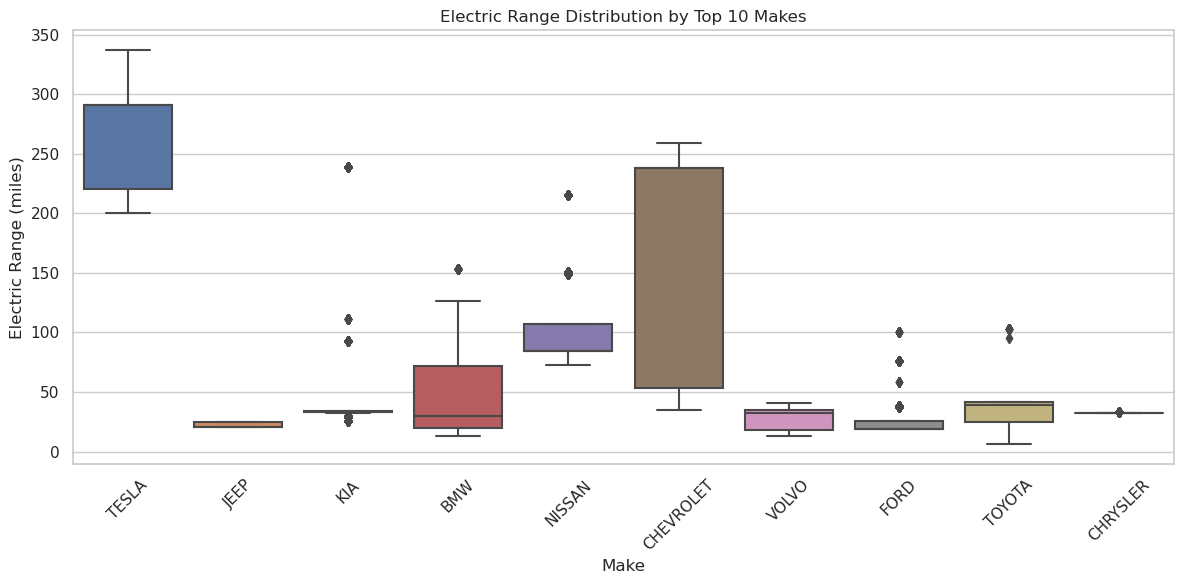

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt


df_nonzero = df[df['Electric Range'] > 0]

top_makes = df_nonzero['Make'].value_counts().nlargest(10).index

df_top = df_nonzero[df_nonzero['Make'].isin(top_makes)]

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='Make', y='Electric Range')
plt.title('Electric Range Distribution by Top 10 Makes')
plt.xticks(rotation=45)
plt.xlabel('Make')
plt.ylabel('Electric Range (miles)')
plt.tight_layout()
plt.show()


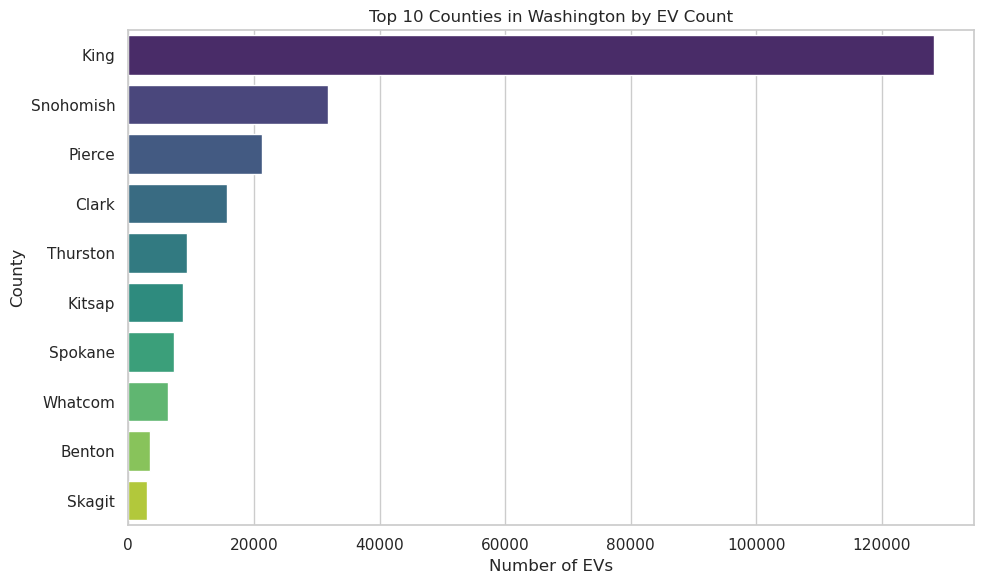

In [21]:
top_counties = df['County'].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_counties.values, y=top_counties.index, palette='viridis')
plt.title('Top 10 Counties in Washington by EV Count')
plt.xlabel('Number of EVs')
plt.ylabel('County')
plt.tight_layout()
plt.show()

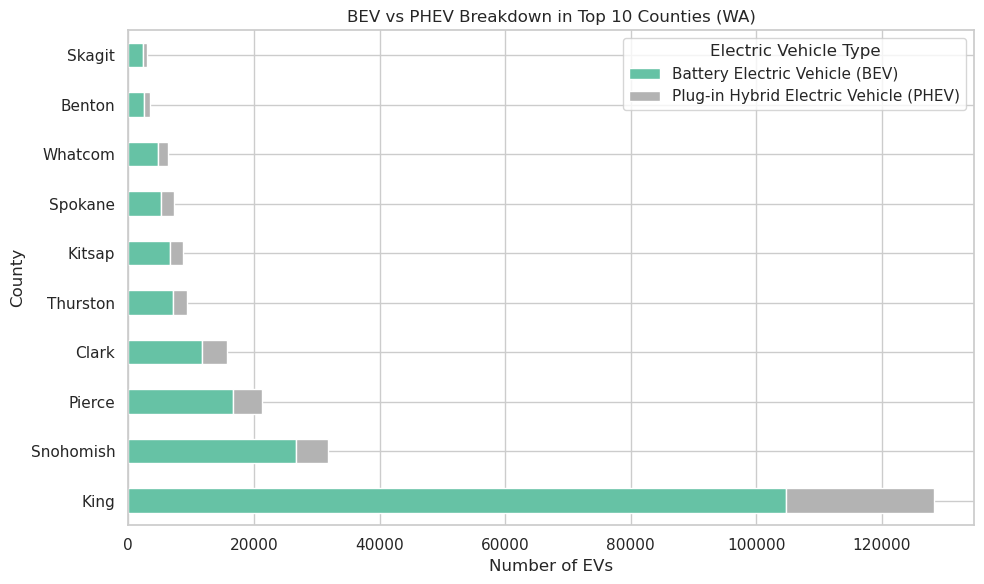

In [22]:
county_type = df.groupby(['County', 'Electric Vehicle Type']).size().unstack(fill_value=0)
top_county_type = county_type.loc[top_counties.index]  # keep only top 10 counties
top_county_type.plot(kind='barh', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('BEV vs PHEV Breakdown in Top 10 Counties (WA)')
plt.xlabel('Number of EVs')
plt.ylabel('County')
plt.tight_layout()
plt.show()

Question 2:Which manufacturers dominate the electric vehicle market in Washington state, and how does their Base MSRP price compare to their electric range?

In [23]:
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')
df_clean = df.dropna(subset=['Make', 'Electric Vehicle Type', 'Electric Range'])
df_clean = df_clean[df_clean['Electric Range'] > 0]

make_counts = df_clean['Make'].value_counts().head(10)
manufacturers = make_counts.index
counts = make_counts.values 
print(make_counts)

Make
TESLA        106039
NISSAN        13971
CHEVROLET     12672
TOYOTA         8964
KIA            7346
BMW            6766
JEEP           6496
VOLVO          4374
FORD           4055
CHRYSLER       3817
Name: count, dtype: int64


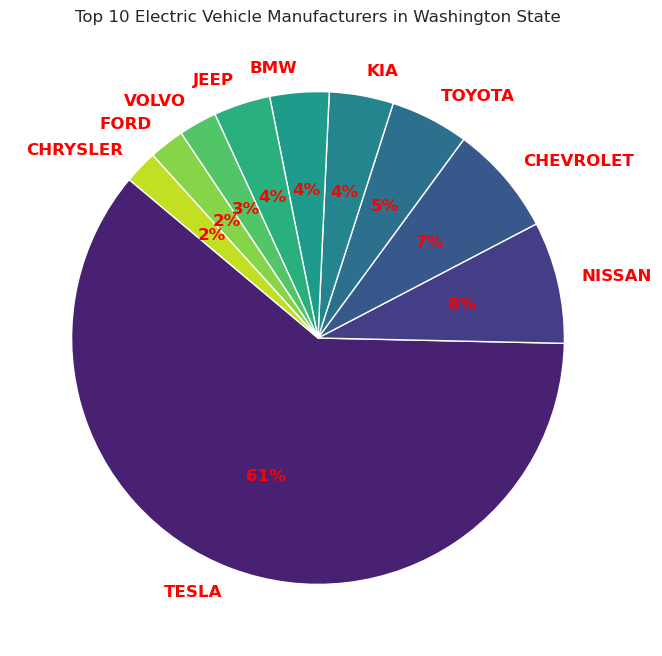

In [24]:
plt.figure(figsize=(8,8))

def red_autopct(pct):
    return f'{round(pct)}%'

plt.pie(
    counts,
    labels=manufacturers,
    autopct=red_autopct,
    startangle=140,
    colors=sns.color_palette('viridis', len(counts)),
    textprops={'color':'red', 'weight':'bold', 'fontsize':12}
)

plt.title('Top 10 Electric Vehicle Manufacturers in Washington State')
plt.show()

In [25]:
range_by_type = df.groupby('Electric Vehicle Type')['Electric Range'].mean().reset_index()
range_by_type.columns = ['EV_Type', 'Average_Electric_Range']

print("Top manufacturers in WA:")
print(top_makes)
print("\nAverage Electric Range by EV Type in WA:")
print(range_by_type)

Top manufacturers in WA:
Index(['TESLA', 'CHEVROLET', 'NISSAN', 'FORD', 'KIA', 'BMW', 'TOYOTA',
       'HYUNDAI', 'RIVIAN', 'VOLVO'],
      dtype='object', name='Make')

Average Electric Range by EV Type in WA:
                                  EV_Type  Average_Electric_Range
0          Battery Electric Vehicle (BEV)              160.114142
1  Plug-in Hybrid Electric Vehicle (PHEV)               31.457011


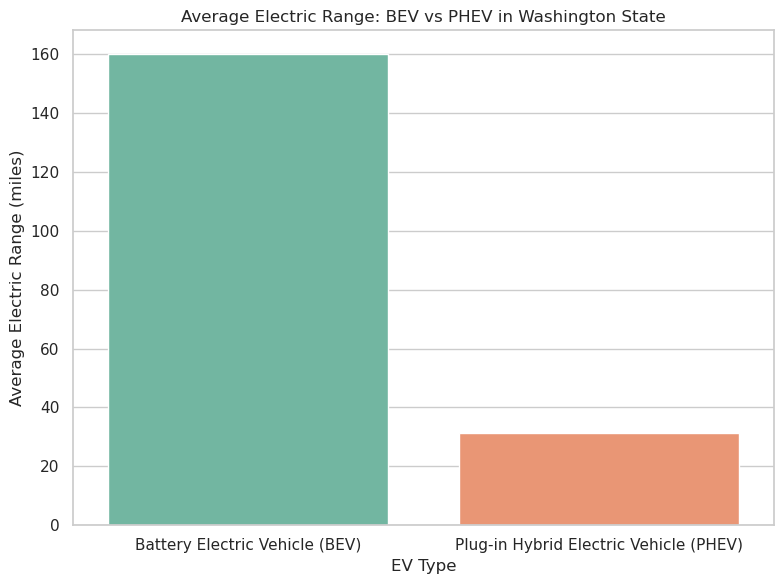

In [26]:
plt.figure(figsize=(8,6))

sns.barplot(data=range_by_type, x='EV_Type', y='Average_Electric_Range', palette='Set2')
plt.title('Average Electric Range: BEV vs PHEV in Washington State')
plt.ylabel('Average Electric Range (miles)')
plt.xlabel('EV Type')
plt.tight_layout()
plt.show()

Question 3: Which model years are most common among electric vehicles?

In [31]:
current_year = 2025

df_filtered = df[df["Model Year"] <= current_year]

year_counts = df_filtered['Model Year'].value_counts().sort_index()

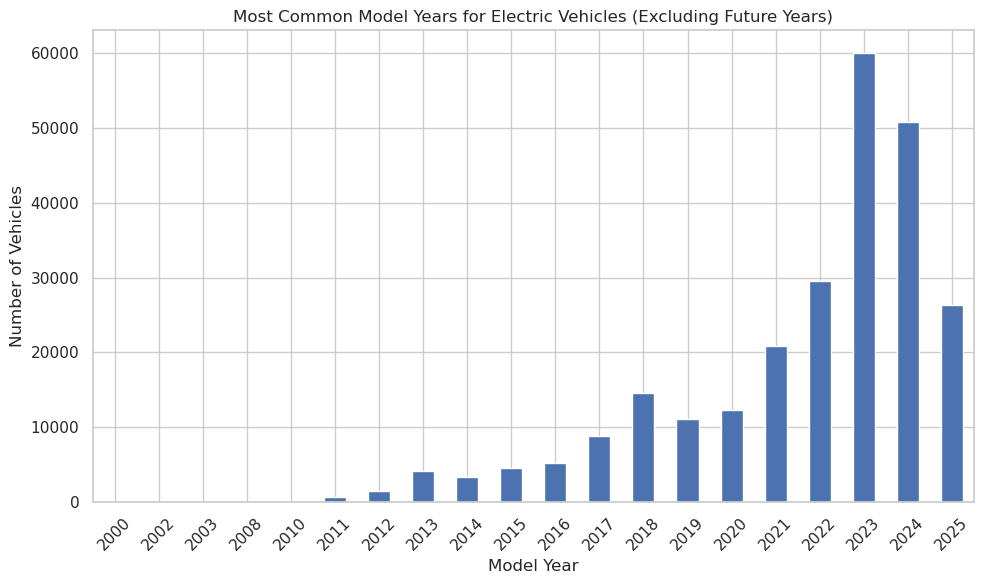

In [32]:
plt.figure(figsize=(10,6))
year_counts.plot(kind='bar')

plt.title("Most Common Model Years for Electric Vehicles (Excluding Future Years)")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Question 4: Which counties have the highest proportion of vehicles with an electric range above 100 miles?

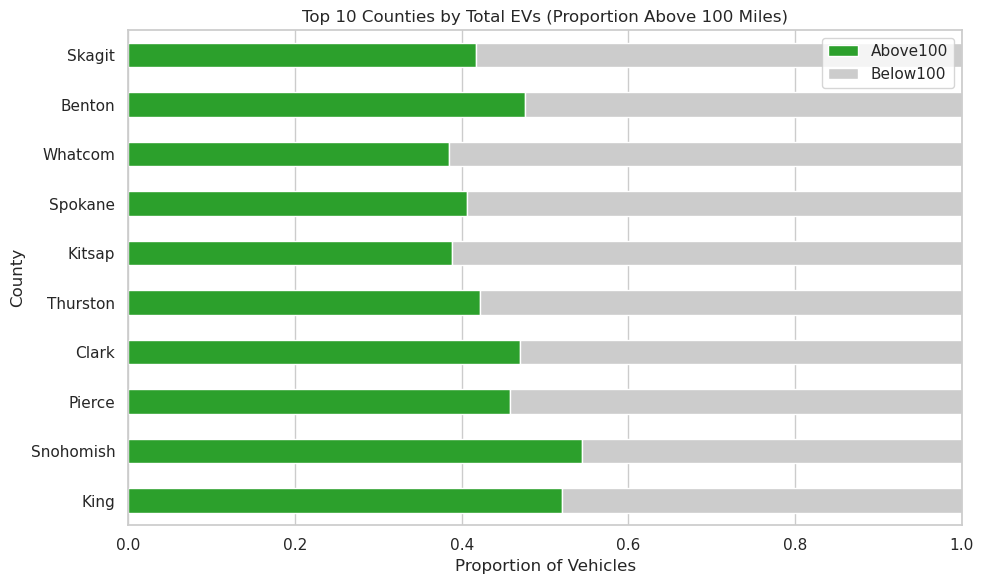

In [60]:
top_total = county_stats.sort_values('total_vehicles', ascending=False).head(10).copy()

# Recompute proportions
top_total['Above100'] = top_total['above100'] / top_total['total_vehicles']
top_total['Below100'] = 1 - top_total['Above100']

# Plot
top_total[['Above100','Below100']].plot(
    kind='barh', stacked=True, figsize=(10,6),
    color=['#2ca02c','#cccccc']
)

plt.title("Top 10 Counties by Total EVs (Proportion Above 100 Miles)")
plt.xlabel("Proportion of Vehicles")
plt.ylabel("County")
plt.xlim(0,1)
plt.tight_layout()
plt.show()
